# Librerias y Data Sets

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

In [ ]:
demografica = pd.read_csv('drive/MyDrive/Nuevos_Datasets_TFM/demografica_mediana_salario.csv')
clientes = pd.read_csv('drive/MyDrive/Nuevos_Datasets_TFM/cliente_activo_reciente.csv')
ventas = pd.read_csv('drive/MyDrive/Nuevos_Datasets_TFM/ventas_cliente_y_producto.csv')

In [ ]:
demografica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5925677 entries, 0 to 5925676
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pk_cid        int64  
 1   pk_partition  object 
 2   country_id    object 
 3   region_code   float64
 4   gender        object 
 5   age           int64  
 6   deceased      object 
 7   salary        float64
 8   age_group     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 406.9+ MB


In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5691497 entries, 0 to 5691496
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   pk_cid           int64 
 1   pk_partition     object
 2   entry_date       object
 3   active_customer  bool  
 4   segment          object
dtypes: bool(1), int64(1), object(3)
memory usage: 179.1+ MB


In [ ]:
#Hago un Left Join a clientes para que tengan la demografica correspondiente
clientes = clientes.merge(demografica, on=["pk_cid", "pk_partition"], how="left")

In [ ]:
clientes.isnull().sum()
#Eliminare los nulos para simplficar los datos

pk_cid                 0
pk_partition           0
entry_date             0
active_customer        0
segment                0
country_id         36676
region_code        36676
gender             36676
age                36676
deceased           36676
salary             36676
age_group          36676
dtype: int64

In [ ]:
clientes.dropna(inplace=True)

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5654821 entries, 0 to 5691496
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pk_cid           int64  
 1   pk_partition     object 
 2   entry_date       object 
 3   active_customer  bool   
 4   segment          object 
 5   country_id       object 
 6   region_code      float64
 7   gender           object 
 8   age              float64
 9   deceased         object 
 10  salary           float64
 11  age_group        object 
dtypes: bool(1), float64(3), int64(1), object(7)
memory usage: 523.1+ MB


In [ ]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   pk_sale              240773 non-null  int64  
 1   pk_cid               240773 non-null  int64  
 2   month_sale           240773 non-null  object 
 3   product_id           240773 non-null  int64  
 4   net_margin           240773 non-null  float64
 5   product_description  240773 non-null  object 
 6   family_product       240773 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 12.9+ MB


In [ ]:
clientes_final = clientes.merge(ventas, on="pk_cid", how="left")

In [ ]:
clientes_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6733218 entries, 0 to 6733217
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   pk_cid               int64  
 1   pk_partition         object 
 2   entry_date           object 
 3   active_customer      bool   
 4   segment              object 
 5   country_id           object 
 6   region_code          float64
 7   gender               object 
 8   age                  float64
 9   deceased             object 
 10  salary               float64
 11  age_group            object 
 12  pk_sale              float64
 13  month_sale           object 
 14  product_id           float64
 15  net_margin           float64
 16  product_description  object 
 17  family_product       object 
dtypes: bool(1), float64(6), int64(1), object(10)
memory usage: 931.1+ MB


In [ ]:
clientes_final.isnull().sum()

pk_cid                       0
pk_partition                 0
entry_date                   0
active_customer              0
segment                      0
country_id                   0
region_code                  0
gender                       0
age                          0
deceased                     0
salary                       0
age_group                    0
pk_sale                4051129
month_sale             4051129
product_id             4051129
net_margin             4051129
product_description    4051129
family_product         4051129
dtype: int64

In [ ]:
clientes_final.tail(10)

,pk_cid,pk_partition,entry_date,active_customer,segment,country_id,region_code,gender,age,deceased,salary,age_group,pk_sale,month_sale,product_id,net_margin,product_description,family_product
6733208,1166741,2019-05,2016-08,True,03 - UNIVERSITARIO,ES,47.0,H,22.0,N,40134.90,20-29,NaN,NaN,NaN,NaN,NaN,NaN
6733209,1166759,2019-05,2016-08,True,03 - UNIVERSITARIO,ES,46.0,H,22.0,N,161098.71,20-29,27194.0,2018-07-01,2234.0,58.7,payroll,account
6733210,1166759,2019-05,2016-08,True,03 - UNIVERSITARIO,ES,46.0,H,22.0,N,161098.71,20-29,46040.0,2018-07-01,1364.0,6356.2,pension_plan,pension_plan
6733211,1166759,2019-05,2016-08,True,03 - UNIVERSITARIO,ES,46.0,H,22.0,N,161098.71,20-29,64248.0,2018-07-01,2235.0,67.9,payroll_account,account
6733212,1166761,2019-05,2016-08,True,03 - UNIVERSITARIO,ES,50.0,H,23.0,N,87747.21,20-29,NaN,NaN,NaN,NaN,NaN,NaN
6733213,1166779,2019-05,2016-08,True,03 - UNIVERSITARIO,ES,50.0,V,23.0,N,57302.85,20-29,99033.0,2018-02-01,3819.0,56.0,debit_card,payment_card
6733214,1166778,2019-05,2016-08,True,03 - UNIVERSITARIO,ES,50.0,V,23.0,N,87747.21,20-29,NaN,NaN,NaN,NaN,NaN,NaN
6733215,1166775,2019-05,2016-08,True,03 - UNIVERSITARIO,ES,50.0,V,23.0,N,77784.78,20-29,NaN,NaN,NaN,NaN,NaN,NaN
6733216,1166763,2019-05,2016-08,True,02 - PARTICULARES,ES,50.0,H,47.0,N,90439.74,40-49,NaN,NaN,NaN,NaN,NaN,NaN
6733217,1550586,2019-05,2019-05,True,04 - SIN SEGMENTO,ES,28.0,H,37.0,N,85322.13,30-39,246811.0,2019-05-01,4657.0,77.5,em_acount,account


In [ ]:
clientes_final.drop('age', axis=1, inplace=True)

In [ ]:
clientes_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6733218 entries, 0 to 6733217
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   pk_cid               int64  
 1   pk_partition         object 
 2   entry_date           object 
 3   active_customer      bool   
 4   segment              object 
 5   country_id           object 
 6   region_code          float64
 7   gender               object 
 8   deceased             object 
 9   salary               float64
 10  age_group            object 
 11  pk_sale              float64
 12  month_sale           object 
 13  product_id           float64
 14  net_margin           float64
 15  product_description  object 
 16  family_product       object 
dtypes: bool(1), float64(5), int64(1), object(10)
memory usage: 879.7+ MB


In [ ]:
clientes_final.drop(clientes_final['deceased'] == 'Y', axis=1, inplace=True)

In [ ]:
clientes_final['deceased'].value_counts()

N    6733218
Name: deceased, dtype: int64

In [ ]:
clientes_final.dropna(inplace=True)

In [ ]:
clientes_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2682089 entries, 0 to 6733217
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   pk_cid               int64  
 1   pk_partition         object 
 2   entry_date           object 
 3   active_customer      bool   
 4   segment              object 
 5   country_id           object 
 6   region_code          float64
 7   gender               object 
 8   deceased             object 
 9   salary               float64
 10  age_group            object 
 11  pk_sale              float64
 12  month_sale           object 
 13  product_id           float64
 14  net_margin           float64
 15  product_description  object 
 16  family_product       object 
dtypes: bool(1), float64(5), int64(1), object(10)
memory usage: 350.4+ MB


In [ ]:
clientes_final = clientes_final[clientes_final['active_customer'] == True]

In [ ]:
clientes_final['active_customer'].value_counts()

True    2157180
Name: active_customer, dtype: int64

# Preparacion de Datos y seleccion de Producto a analizar

In [ ]:
clientes_final['product_description'].value_counts()
#El enfoque de mi presentacion final seran los clientes con productos Crypto

em_acount             660760
debit_card            459160
pension_plan          246655
payroll               240174
payroll_account       218849
emc_account           130492
credit_card            76906
long_term_deposit      54825
short_term_deposit     41122
securities             14981
funds                  12746
loans                    385
mortgage                 125
Name: product_description, dtype: int64

In [ ]:
#Quiero enfocarme en clientes que ya tengan productos Crypto y su descripcion
inversores_crypto = clientes_final[clientes_final['product_description'] == 'emc_account']

In [ ]:
inversores_crypto.head(3)

,pk_cid,pk_partition,entry_date,active_customer,segment,country_id,region_code,gender,deceased,salary,age_group,pk_sale,month_sale,product_id,net_margin,product_description,family_product
646,1050358,2018-01,2015-08,True,03 - UNIVERSITARIO,ES,28.0,V,N,70641.48,30-39,79721.0,2018-04-01,8871.0,84.3,emc_account,account
802,1051765,2018-01,2015-08,True,02 - PARTICULARES,ES,18.0,H,N,53604.78,30-39,79723.0,2018-02-01,8871.0,77.1,emc_account,account
806,1051769,2018-01,2015-08,True,02 - PARTICULARES,ES,41.0,H,N,96174.66,40-49,79724.0,2018-08-01,8871.0,64.9,emc_account,account


In [ ]:
#Se quitan las columnas que aportan informacion redundante
inversores_crypto.drop(['pk_sale', 'product_id', 'family_product'], axis=1, inplace=True)

<ipython-input-25-0796413e5cda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inversores_crypto.drop(['pk_sale', 'product_id', 'family_product'], axis=1, inplace=True)


In [ ]:
inversores_crypto.head(3)

,pk_cid,pk_partition,entry_date,active_customer,segment,country_id,region_code,gender,deceased,salary,age_group,month_sale,net_margin,product_description
646,1050358,2018-01,2015-08,True,03 - UNIVERSITARIO,ES,28.0,V,N,70641.48,30-39,2018-04-01,84.3,emc_account
802,1051765,2018-01,2015-08,True,02 - PARTICULARES,ES,18.0,H,N,53604.78,30-39,2018-02-01,77.1,emc_account
806,1051769,2018-01,2015-08,True,02 - PARTICULARES,ES,41.0,H,N,96174.66,40-49,2018-08-01,64.9,emc_account


In [ ]:
inversores_crypto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130492 entries, 646 to 6733176
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   pk_cid               130492 non-null  int64  
 1   pk_partition         130492 non-null  object 
 2   entry_date           130492 non-null  object 
 3   active_customer      130492 non-null  bool   
 4   segment              130492 non-null  object 
 5   country_id           130492 non-null  object 
 6   region_code          130492 non-null  float64
 7   gender               130492 non-null  object 
 8   deceased             130492 non-null  object 
 9   salary               130492 non-null  float64
 10  age_group            130492 non-null  object 
 11  month_sale           130492 non-null  object 
 12  net_margin           130492 non-null  float64
 13  product_description  130492 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(9)
memory usage: 14.1+ M

In [ ]:
inversores_crypto['pk_cid'].value_counts()

1358544    17
1364572    17
1357909    17
1357872    17
1357943    17
           ..
323415      1
1357381     1
1351912     1
1383256     1
1137242     1
Name: pk_cid, Length: 11776, dtype: int64

In [ ]:
cliente_x = inversores_crypto[inversores_crypto['pk_cid'] == 1358544]
#Se aisla 1 cliente para hacer mas analisis

In [ ]:
cliente_x.head(3)
#Pareciera que no hay cambios en 'net_margin' ni 'month_sale' por registro

,pk_cid,pk_partition,entry_date,active_customer,segment,country_id,region_code,gender,deceased,salary,age_group,month_sale,net_margin,product_description
155037,1358544,2018-01,2017-11,True,01 - TOP,ES,28.0,H,N,63660.63,30-39,2018-03-01,50.2,emc_account
402967,1358544,2018-02,2017-11,True,01 - TOP,ES,28.0,H,N,63660.63,30-39,2018-03-01,50.2,emc_account
674697,1358544,2018-03,2017-11,True,01 - TOP,ES,28.0,H,N,63660.63,30-39,2018-03-01,50.2,emc_account


In [ ]:
cliente_x['net_margin'].value_counts()
#El margen no cambia por registro

50.2    17
Name: net_margin, dtype: int64

In [ ]:
cliente_x['month_sale'].value_counts()
#El mes de la venta tampoco cambia por registro

2018-03-01    17
Name: month_sale, dtype: int64

In [ ]:
inversores_crypto = inversores_crypto.groupby('pk_cid').first().reset_index()
#Se hara el DF solamente con la primera instancia de cada cliente

In [ ]:
inversores_crypto.head(3)

,pk_cid,pk_partition,entry_date,active_customer,segment,country_id,region_code,gender,deceased,salary,age_group,month_sale,net_margin,product_description
0,16502,2018-10,2018-09,True,02 - PARTICULARES,ES,28.0,H,N,97764.48,50-59,2019-01-01,68.6,emc_account
1,18146,2019-02,2019-02,True,04 - SIN SEGMENTO,ES,28.0,V,N,104858.97,60-69,2019-05-01,76.9,emc_account
2,20243,2018-09,2018-09,True,04 - SIN SEGMENTO,ES,28.0,H,N,103532.61,70-79,2018-12-01,61.6,emc_account


In [ ]:
inversores_crypto.shape

(11776, 14)

In [ ]:
inversores_crypto['pk_partition'] = pd.to_datetime(inversores_crypto['pk_partition'], format='%Y-%m-%d').dt.strftime('%Y-%m')

In [ ]:
inversores_crypto['entry_date'] = pd.to_datetime(inversores_crypto['entry_date'], format='%Y-%m-%d').dt.strftime('%Y-%m')

In [ ]:
inversores_crypto['month_sale'] = pd.to_datetime(inversores_crypto['month_sale'], format='%Y-%m-%d').dt.strftime('%Y-%m')

In [ ]:
inversores_crypto['net_margin'].describe()

count    11776.000000
mean        70.024176
std         10.066418
min         30.400000
25%         63.100000
50%         70.000000
75%         76.900000
max        111.800000
Name: net_margin, dtype: float64

In [ ]:
clientes_final[clientes_final['net_margin'] == 111.80].head(5)
#No me voy a concentrar mucho en 'segment' ya que cambia por cada pk_partition sin alterar el resto de las variables por registro.
#Para variables de fecha dejare solo entry_date y month_sale para ver si estan correlacionadas

,pk_cid,pk_partition,entry_date,active_customer,segment,country_id,region_code,gender,deceased,salary,age_group,pk_sale,month_sale,product_id,net_margin,product_description,family_product
2094195,1404684,2018-07,2018-07,True,04 - SIN SEGMENTO,ES,6.0,H,N,67039.83,40-49,86356.0,2018-10-01,8871.0,111.8,emc_account,account
2235088,1404684,2018-08,2018-07,True,01 - TOP,ES,6.0,H,N,67039.83,40-49,86356.0,2018-10-01,8871.0,111.8,emc_account,account
2854560,1404684,2018-09,2018-07,True,01 - TOP,ES,6.0,H,N,67039.83,40-49,86356.0,2018-10-01,8871.0,111.8,emc_account,account
3167495,1404684,2018-10,2018-07,True,01 - TOP,ES,6.0,H,N,67039.83,40-49,86356.0,2018-10-01,8871.0,111.8,emc_account,account
3697022,1404684,2018-11,2018-07,True,01 - TOP,ES,6.0,H,N,67039.83,40-49,86356.0,2018-10-01,8871.0,111.8,emc_account,account


In [ ]:
inversores_crypto.drop('pk_partition', axis=1, inplace=True)

In [ ]:
inversores_crypto.drop('segment', axis=1, inplace=True)

In [ ]:
inversores_crypto.head()

,pk_cid,entry_date,active_customer,country_id,region_code,gender,deceased,salary,age_group,month_sale,net_margin,product_description
0,16502,2018-09,True,ES,28.0,H,N,97764.48,50-59,2019-01,68.6,emc_account
1,18146,2019-02,True,ES,28.0,V,N,104858.97,60-69,2019-05,76.9,emc_account
2,20243,2018-09,True,ES,28.0,H,N,103532.61,70-79,2018-12,61.6,emc_account
3,22635,2019-02,True,ES,28.0,H,N,90439.74,40-49,2019-03,68.9,emc_account
4,25612,2017-12,True,ES,28.0,H,N,214100.97,70-79,2018-04,82.8,emc_account


In [ ]:
inversores_crypto['salary'].describe()

count    1.177600e+04
mean     1.146585e+05
std      3.532024e+05
min      1.332003e+04
25%      8.532213e+04
50%      9.043974e+04
75%      1.095241e+05
max      2.889440e+07
Name: salary, dtype: float64

In [ ]:
inversores_crypto['net_margin'].describe()

count    11776.000000
mean        70.024176
std         10.066418
min         30.400000
25%         63.100000
50%         70.000000
75%         76.900000
max        111.800000
Name: net_margin, dtype: float64

In [ ]:
#Redondeo de los valores de 'net_margin' y 'salary', para asi ver la cifra de Salary completa
pd.options.display.float_format = '{:.0f}'.format

In [ ]:
inversores_crypto = inversores_crypto[inversores_crypto['salary'] < 1000000]
#Esto se hace para que los outliers no afecten a la grafica

In [ ]:
inversores_crypto['salary'].describe()

count    11763
mean    108193
std      64182
min      13320
25%      85322
50%      90440
75%     109292
max     994375
Name: salary, dtype: float64

In [ ]:
inversores_crypto['net_margin'].describe()

count   11763
mean       70
std        10
min        30
25%        63
50%        70
75%        77
max       112
Name: net_margin, dtype: float64

# Visualizaciones

<Axes: title={'center': 'Net Margin in Function of Salary'}, xlabel='salary', ylabel='net_margin'>

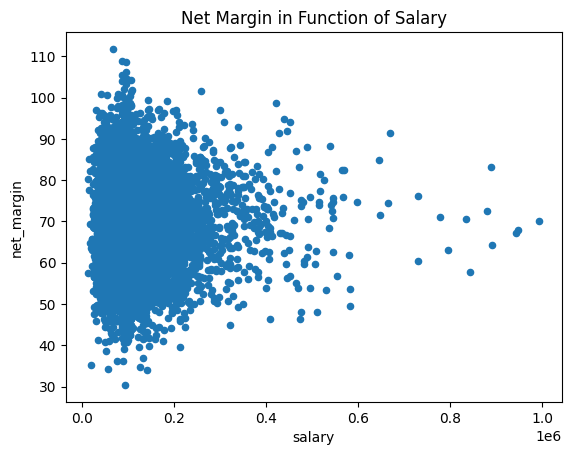

In [ ]:
inversores_crypto.plot(kind="scatter", x='salary', y='net_margin', title='Net Margin in Function of Salary')

In [ ]:
inversores_crypto['net_margin'].sum().round()

823637.0

<Axes: xlabel='Count', ylabel='age_group'>

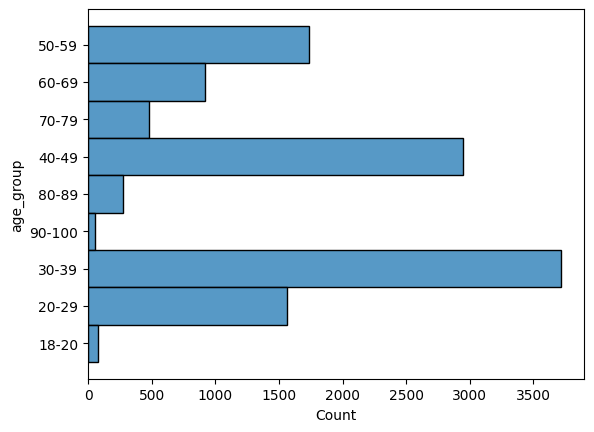

In [ ]:
sns.histplot(data=inversores_crypto, y='age_group')

In [ ]:
inversores_crypto.groupby('age_group')['net_margin'].agg(['median', 'min', 'max']).reset_index()

,age_group,median,min,max
0,18-20,68,42,95
1,20-29,70,35,100
2,30-39,70,30,109
3,40-49,70,36,112
4,50-59,70,41,104
5,60-69,70,35,101
6,70-79,70,43,99
7,80-89,71,41,106
8,90-100,69,50,104


In [ ]:
inversores_crypto.groupby('age_group')['salary'].agg(['median', 'min', 'max']).reset_index()

,age_group,median,min,max
0,18-20,121955,31479,431065
1,20-29,87747,13320,890324
2,30-39,85322,13320,796593
3,40-49,90440,17208,947822
4,50-59,97764,22751,994375
5,60-69,104859,22436,889576
6,70-79,103533,20644,553966
7,80-89,95954,33329,730039
8,90-100,106351,17174,326559
